### Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C, PPO

import quantstats as qs

In [19]:
from stable_baselines3 import A2C, PPO

### Create Env

In [26]:
df = yf.Ticker("ADBE")
df = df.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-08-13 00:00:00-04:00,0.000000,0.205392,0.198057,0.198057,18899200,0.0,0.0
1986-08-14 00:00:00-04:00,0.000000,0.216395,0.209059,0.209059,4160000,0.0,0.0
1986-08-15 00:00:00-04:00,0.000000,0.209060,0.205392,0.205392,4332800,0.0,0.0
1986-08-18 00:00:00-04:00,0.000000,0.205392,0.198057,0.198057,2828800,0.0,0.0
1986-08-19 00:00:00-04:00,0.000000,0.205392,0.201725,0.201725,2060800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-12 00:00:00-04:00,477.950012,478.779999,468.600006,474.089996,5620000,0.0,0.0
2024-04-15 00:00:00-04:00,477.019989,478.519989,468.350006,470.100006,3353200,0.0,0.0
2024-04-16 00:00:00-04:00,470.000000,478.980011,468.489990,476.220001,2660100,0.0,0.0


In [40]:
df.loc['2023-12-01':, :]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,LMA,RSI,EMA12,EMA26,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2023-12-01 00:00:00-05:00,609.239990,615.200012,603.179993,612.469971,2490000,0.0,0.0,0.000000,0.000000,0.000000,612.469971,612.469971,0.000000,0.000000
2023-12-04 00:00:00-05:00,604.909973,608.289978,596.210022,604.559998,2541500,0.0,0.0,0.000000,0.000000,0.000000,611.253052,611.884047,-0.630995,-0.126199
2023-12-05 00:00:00-05:00,596.770020,602.739990,591.169983,602.219971,2577700,0.0,0.0,0.000000,0.000000,0.000000,609.863347,611.168189,-1.304842,-0.361928
2023-12-06 00:00:00-05:00,608.059998,608.530029,594.489990,595.700012,2080400,0.0,0.0,0.000000,0.000000,0.000000,607.684372,610.022398,-2.338026,-0.757147
2023-12-07 00:00:00-05:00,598.919983,609.229980,596.469971,608.780029,2605200,0.0,0.0,604.745996,0.000000,0.000000,607.852935,609.930371,-2.077436,-1.021205
2023-12-08 00:00:00-05:00,605.000000,610.229980,601.299988,610.010010,2498800,0.0,0.0,604.254004,0.000000,0.000000,608.184793,609.936270,-1.751478,-1.167260
2023-12-11 00:00:00-05:00,616.880005,627.820007,614.340027,625.200012,3270600,0.0,0.0,608.382007,0.000000,0.000000,610.802519,611.066918,-0.264399,-0.986687
2023-12-12 00:00:00-05:00,625.859985,633.890015,623.000000,633.659973,2968900,0.0,0.0,614.670007,0.000000,0.000000,614.319050,612.740477,1.578573,-0.473635
2023-12-13 00:00:00-05:00,630.409973,632.450012,618.030029,624.260010,6188500,0.0,0.0,620.382007,0.000000,0.000000,615.848429,613.593776,2.254652,0.072022


In [41]:
import yfinance as yf

df = yf.Ticker("ADBE")
df = df.history(period="max")
df = df.loc['2024-01-01':, :]
# Calculate Moving Averages
df['SMA'] = df['Close'].rolling(window=5).mean()  # Short-term moving average
df['LMA'] = df['Close'].rolling(window=20).mean()  # Long-term moving average

# Calculate RSI
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
        
# Handling NaN values that may appear due to the rolling and ewm functions
df.fillna(0, inplace=True)

window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [42]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,LMA,RSI,EMA12,EMA26,MACD,Signal_Line
Date,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,589.510010,590.440002,576.760010,580.070007,2840200,0.0,0.0,0.000000,0.0,0.0,580.070007,580.070007,0.000000,0.000000
2024-01-03 00:00:00-05:00,574.580017,577.299988,570.190002,571.789978,2478000,0.0,0.0,0.000000,0.0,0.0,578.796157,579.456672,-0.660515,-0.132103
2024-01-04 00:00:00-05:00,570.989990,572.909973,566.659973,567.049988,2092100,0.0,0.0,0.000000,0.0,0.0,576.989054,578.537658,-1.548604,-0.415403
2024-01-05 00:00:00-05:00,563.500000,569.520020,563.340027,564.599976,1922900,0.0,0.0,0.000000,0.0,0.0,575.083042,577.505237,-2.422196,-0.816762
2024-01-08 00:00:00-05:00,567.869995,581.510010,567.869995,580.549988,2830000,0.0,0.0,572.811987,0.0,0.0,575.924110,577.730774,-1.806664,-1.014742


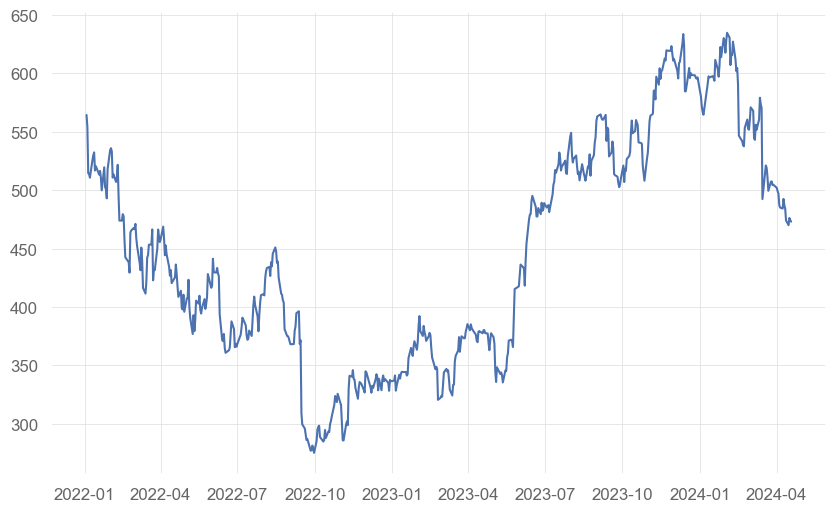

In [4]:
plt.plot(df.Close)

In [28]:
# df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

# window_size = 10
# start_index = window_size
# end_index = len(df)

# env = gym.make(
#     'stocks-v0',
#     df=df,
#     window_size=window_size,
#     frame_bound=(start_index, end_index)
# )

# print("observation_space:", env.observation_space)

### Train Env

In [43]:
env.reset(seed=2023)
model = A2C('MlpPolicy', env, verbose=0, seed=2023)
model.learn(total_timesteps=1000)

In [5]:
env.reset(seed=2023)
model = PPO('MlpPolicy', env, verbose=0, seed=2023)
model.learn(total_timesteps=100)

### Test Env

In [44]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset(seed=2023)

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 61, <Actions.Buy: 1>: 3}
info: {'total_reward': 2.77001953125, 'total_profit': 0.9589879066740387, 'position': <Positions.Short: 0>}


### Plot Results

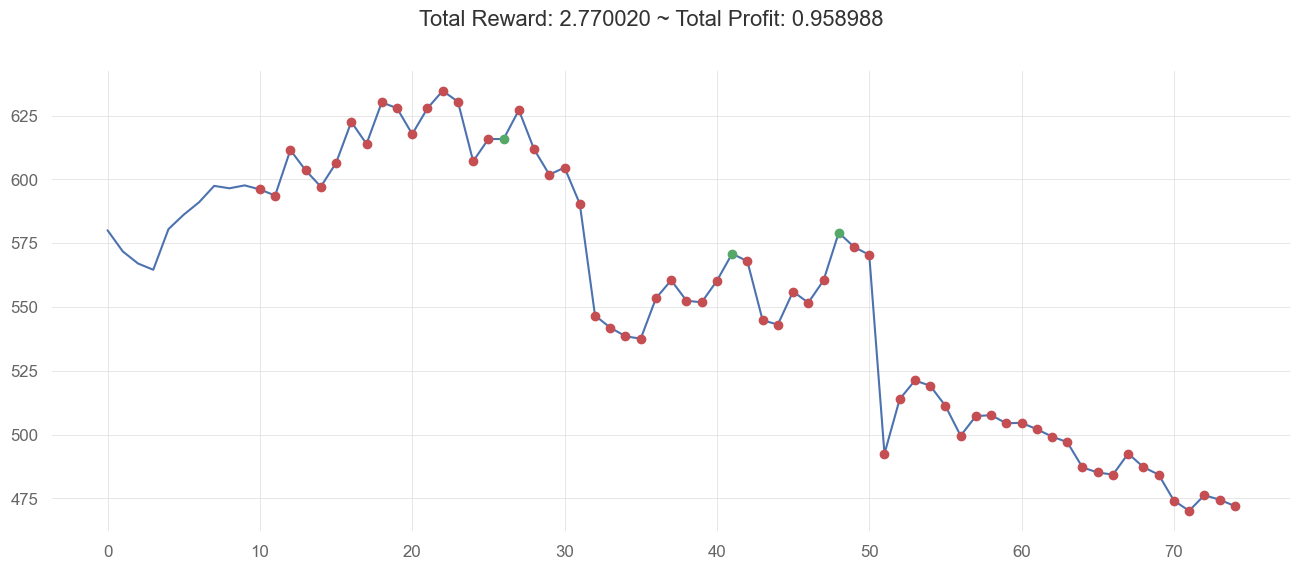

In [45]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

### Analysis Using `quantstats`

In [46]:
env.unwrapped.history['total_profit']

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 1.0032040509848617,
 0.9830308631243388,
 0.9830308631243388,
 0.9830308631243388,
 0.9830308631243388,
 0.9830308631243388,
 0.9830308631243388,
 0.9830308631243388,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 0.9589879066740387,
 

In [12]:
pd.Series(env.unwrapped.history['total_profit'], index=df.index[start_index+1:end_index])

Date
2022-01-19 00:00:00-05:00    1.000000
2022-01-20 00:00:00-05:00    1.000000
2022-01-21 00:00:00-05:00    0.963955
2022-01-24 00:00:00-05:00    0.963955
2022-01-25 00:00:00-05:00    0.963955
                               ...   
2024-04-12 00:00:00-04:00    0.121500
2024-04-15 00:00:00-04:00    0.121500
2024-04-16 00:00:00-04:00    0.121500
2024-04-17 00:00:00-04:00    0.121500
2024-04-18 00:00:00-04:00    0.118890
Length: 565, dtype: float64

In [16]:
net_worth.pct_change().iloc[1:].head(200)

Date
2022-01-20 00:00:00-05:00    0.000000
2022-01-21 00:00:00-05:00   -0.036045
2022-01-24 00:00:00-05:00    0.000000
2022-01-25 00:00:00-05:00    0.000000
2022-01-26 00:00:00-05:00    0.000000
2022-01-27 00:00:00-05:00    0.000000
2022-01-28 00:00:00-05:00    0.000000
2022-01-31 00:00:00-05:00    0.067462
2022-02-01 00:00:00-05:00    0.000000
2022-02-02 00:00:00-05:00    0.000000
2022-02-03 00:00:00-05:00    0.000000
2022-02-04 00:00:00-05:00   -0.056191
2022-02-07 00:00:00-05:00    0.000000
2022-02-08 00:00:00-05:00    0.000000
2022-02-09 00:00:00-05:00    0.005163
2022-02-10 00:00:00-05:00    0.000000
2022-02-11 00:00:00-05:00   -0.056838
2022-02-14 00:00:00-05:00    0.000000
2022-02-15 00:00:00-05:00   -0.003541
2022-02-16 00:00:00-05:00    0.000000
2022-02-17 00:00:00-05:00   -0.056171
2022-02-18 00:00:00-05:00    0.000000
2022-02-22 00:00:00-05:00    0.000000
2022-02-23 00:00:00-05:00    0.000000
2022-02-24 00:00:00-05:00    0.042167
2022-02-25 00:00:00-05:00    0.000000
2022-02

In [15]:
pd.set_option('display.max_rows', 500)

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

                           Strategy
-------------------------  ----------
Start Period               2022-01-20
End Period                 2024-04-18
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -88.11%
CAGR﹪                     -48.07%

Sharpe                     -2.7
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -2.62
Sortino                    -2.99
Smart Sortino              -2.9
Sortino/√2                 -2.11
Smart Sortino/√2           -2.05
Omega                      0.35

Max Drawdown               -88.45%
Longest DD Days            805
Volatility (ann.)          33.04%
Calmar                     -0.54
Skew                       -2.98
Kurtosis                   25.94

Expected Daily %           -0.38%
Expected Monthly %         -7.32%
Expected Yearly %          -50.83%
Kelly Criterion            -60.56%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.78%
Expected Shortfall (cVaR)  -3.78%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-04,2024-04-18,2024-04-18,804,-88.445914,-87.518529
2,2022-01-21,2022-01-21,2022-01-28,8,-3.604513,NaN


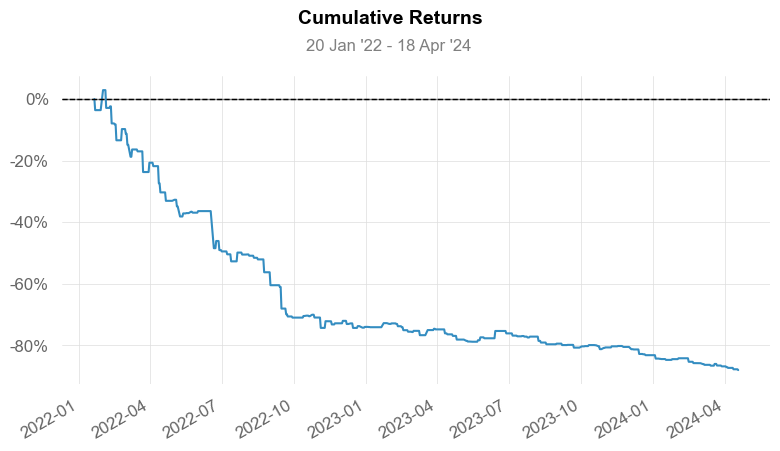

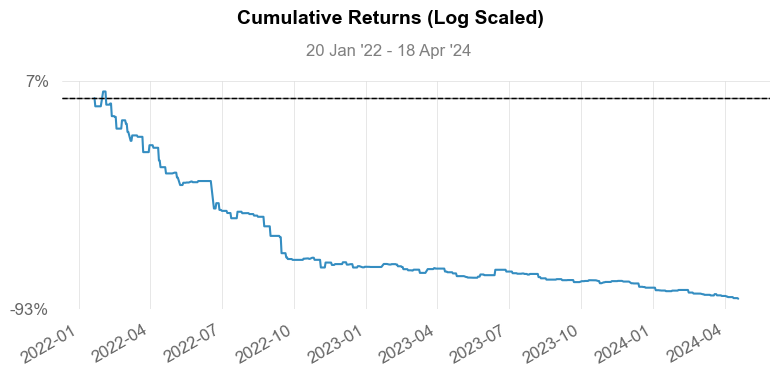

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


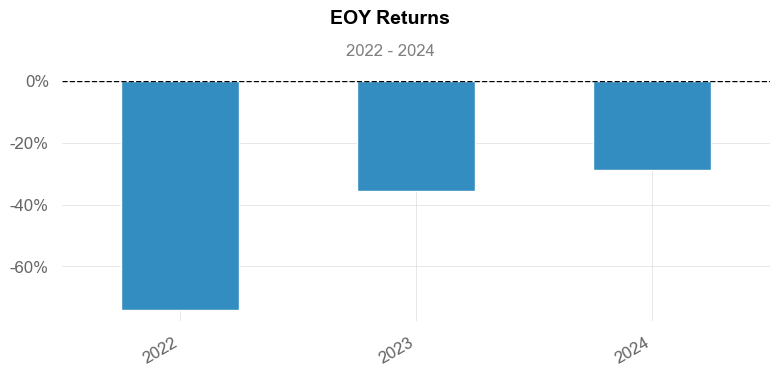

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

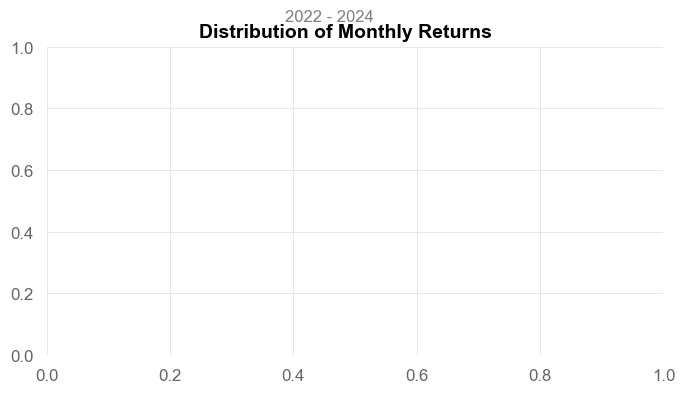

In [17]:
qs.reports.full(returns)

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

                           Strategy
-------------------------  ----------
Start Period               2022-01-20
End Period                 2024-04-18
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -88.11%
CAGR﹪                     -48.07%

Sharpe                     -2.7
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -2.62
Sortino                    -2.99
Smart Sortino              -2.9
Sortino/√2                 -2.11
Smart Sortino/√2           -2.05
Omega                      0.35

Max Drawdown               -88.45%
Longest DD Days            805
Volatility (ann.)          33.04%
Calmar                     -0.54
Skew                       -2.98
Kurtosis                   25.94

Expected Daily %           -0.38%
Expected Monthly %         -7.32%
Expected Yearly %          -50.83%
Kelly Criterion            -60.56%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.78%
Expected Shortfall (cVaR)  -3.78%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-04,2024-04-18,2024-04-18,804,-88.445914,-87.518529
2,2022-01-21,2022-01-21,2022-01-28,8,-3.604513,NaN


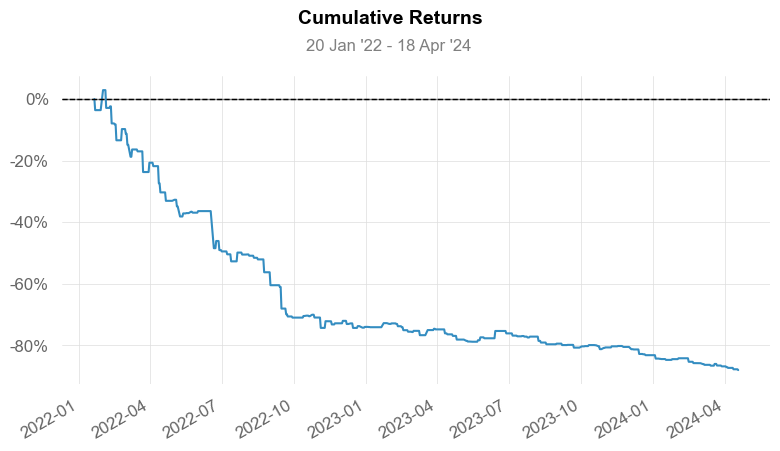

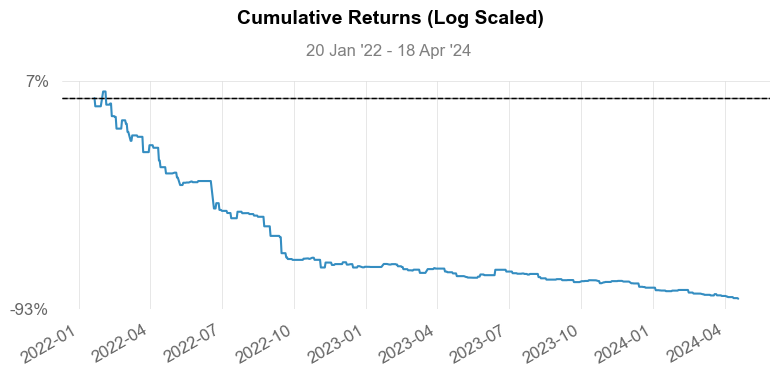

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


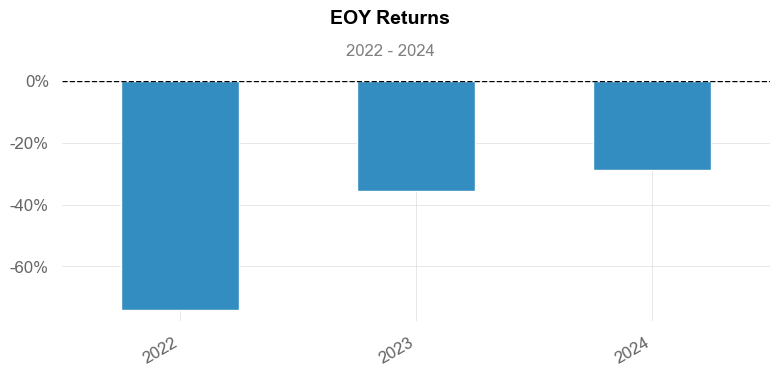

c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
c:\Users\supha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

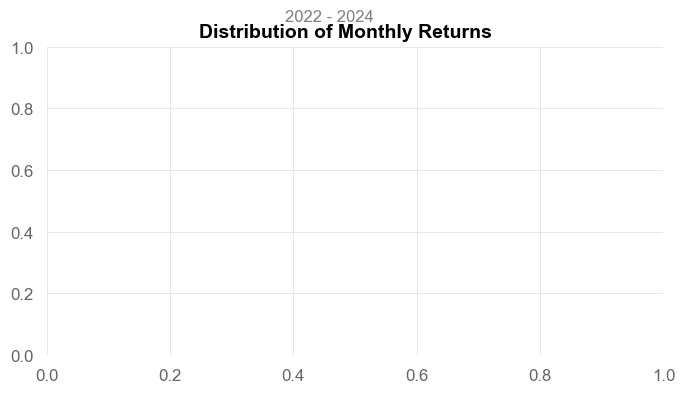

In [8]:
qs.extend_pandas()

net_worth = pd.Series(env.unwrapped.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='SB3_a2c_quantstats.html')